# SI221: Bases de l'apprentissage - TP "Décision Bayésienne"
*Author : Benjamin TERNOT*

## 1. Préliminaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import math
from numpy.linalg import det
from IPython.display import Markdown

In [2]:
#Fixer la seed aléatoire pour reproductibilité des résultats
fixer_random = True
if fixer_random:
    np.random.seed(42)
else:
    np.random.seed()

In [3]:
from IPython.display import display, Markdown

#quelques fonctions permettenant d'afficher de manière plus esthétiques les tableaux numpy en markdown

def array_to_markdown(arr):
    if (arr.ndim==1):
        return r'\begin{pmatrix}' + ' & '.join([str(elem) for elem in arr]) + r'\end{pmatrix}'
    elif (arr.ndim ==2):
        latex_str = r'\begin{pmatrix}'
        for row in arr:
            latex_str += ' & '.join([str(elem) for elem in row])
            latex_str += r'\\'
        latex_str += r'\end{pmatrix}'
        return latex_str
    raise ValueError(f" array can not be display if it has {arr.ndim()} dimensions") 
def display_markdown(string):
    display(Markdown(string))

## 2. Génération d'une variable aléatoire gaussienne
En utilisant la fonction randn, générer N échantillons d'une variable aléatoire
gaussienne de moyenne 3 et de variance 4. Etudier l'évolution de la moyenne et de la
variance empiriques en fonction de N.

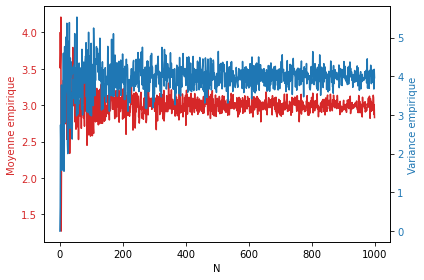

In [4]:
# Définir la moyenne et la variance de la distribution normale et le nombre maximum d'échantillons
mu = 3
var = 4
nb_echantillons = 1000

# Créer une liste vide pour stocker la moyenne et la variance empirique
emp_moy = np.empty(nb_echantillons, dtype='float64')
emp_var = np.empty(nb_echantillons, dtype='float64')

# Générer des échantillons pour différentes valeurs de N
for N in range(1, nb_echantillons + 1):
    # Générer N échantillons de la distribution normale
    echantillons = np.random.randn(N) * np.sqrt(var) + mu
    
    # Ajouter les résultats aux listes
    emp_moy[N-1] = echantillons.mean()
    emp_var[N-1] = echantillons.var()

# Tracer les résultats
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

couleur = 'tab:red'
ax1.set_xlabel('N')
ax1.set_ylabel('Moyenne empirique', color=couleur)
ax1.plot(emp_moy, color=couleur)
ax1.tick_params(axis='y', labelcolor=couleur)

ax2 = ax1.twinx()

couleur = 'tab:blue'
ax2.set_ylabel('Variance empirique', color=couleur)
ax2.plot(emp_var, color=couleur)
ax2.tick_params(axis='y', labelcolor=couleur)

fig.tight_layout()
plt.show()


La variance et moyenne empiriques tendent bien vers celles théoriques.

## 3. Génération de vecteurs aléatoires gaussiens

On va générer en dimension 2, un ensemble d'apprentissage constitué de trois classes
d'échantillons suivant des lois normales, de vecteurs moyenne et de matrices de
covariance donnés.
1) Générer un échantillon de taille N=100 d'un vecteur aléatoire gaussien défini par le vecteur moyenne $m=\left[4, 9\right]$ et la matrice de covariance égale à l'identité. Afficher les échantillons.

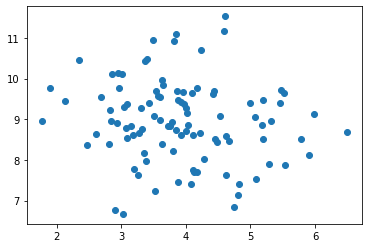

In [5]:
# Définir la moyenne et la variance de la distribution normale et le nombre d'échantillons
m = np.array([4, 9])
C = np.eye(2)
N = 100

# Générer N échantillons de la distribution normale
Z = np.random.randn(2, N)

# Transformer les échantillons pour avoir les moyenne et matrice de covariance désirées
X = Z + m[:, np.newaxis]

# Afficher les échantillons
plt.scatter(X[0,:],X[1,:])
plt.show()

2) Donner l'expression permettant de générer N=100 échantillons d'un vecteur aléatoire de moyenne $m=\begin{pmatrix}4&9\end{pmatrix}$ et de matrice de covariance diagonale $s=\begin{pmatrix} 1 & 0 \\ 0 & 6 \end{pmatrix}$. Vérifier votre résultat en utilisant les fonctions `mean` et `cov` et afficher les échantillons.

In [6]:
# Définir les paramètres de la distribution
m = np.array([4, 9])
s = np.array([[1, 0],
              [0, 6]])

# Générer 100 échantillons
Z = np.random.randn(2, 100)
X = sqrtm(s) @ Z + m[:, np.newaxis]

# Vérifier le résultat
display_markdown(f"Moyenne:$${array_to_markdown(np.around(X.mean(axis=1),2))}$$")
display_markdown(f"Covariance:$${array_to_markdown(np.around(np.cov(X),2))}$$")

Moyenne:$$\begin{pmatrix}3.83 & 9.24\end{pmatrix}$$

Covariance:$$\begin{pmatrix}0.85 & 0.02\\0.02 & 6.02\\\end{pmatrix}$$

3) Soit $X$ un vecteur aléatoire gaussien centré de matrice de covariance égale à l'identité. Chercher une transformation linéaire $X'= UX$ qui permette d'obtenir un vecteur aléatoire centré de matrice de covariance $\Sigma$.

$=>$ Il suffit de prendre $U$ telle que $UU^T=\Sigma$.

4) Générer des échantillons dont la matrice de covariance est égale à $s=\begin{pmatrix} 2 & 2 \\ 2 & 5 \end{pmatrix}$. Vérifier votre résultat avec les fonctions `mean` et `cov`. Calculer l'orientation de l'ellipsoide de Mahalanobis asscociée à $s$. Vérifier la relation liant $s$ à sa matrice diagonalisée.

Moyenne:$$\begin{pmatrix}-0.02 & 0.02\end{pmatrix}$$

Covariance:$$\begin{pmatrix}1.88 & 1.78\\1.78 & 4.06\\\end{pmatrix}$$

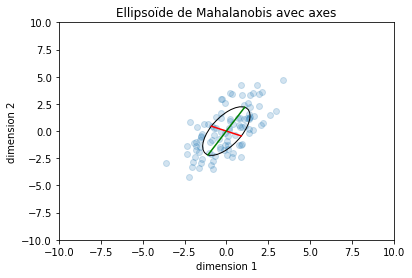

$$\theta_{ellipse}\simeq153.43°$$

$$s=\begin{pmatrix}2 & 2\\2 & 5\\\end{pmatrix}$$ $$V=\begin{pmatrix}-0.8944271909999159 & -0.4472135954999579\\0.4472135954999579 & -0.8944271909999159\\\end{pmatrix}$$ $$S_{diag} = \begin{pmatrix}1.0 & 0.0\\0.0 & 6.0\\\end{pmatrix}$$$$\widetilde{s}=V\cdot S_d \cdot V^T=\begin{pmatrix}2.0 & 2.0\\2.0 & 5.0\\\end{pmatrix}$$ La matrice reconstruite est bien la même que celle d'origine.

In [7]:
from matplotlib.patches import Ellipse

# Définir les paramètres de la distribution
s = np.array([[2, 2],
              [2, 5]])

# Générer 100 échantillons
Z = np.random.randn(2, 100)
X = sqrtm(s) @ Z

# Vérifier le résultat
display_markdown(f"Moyenne:$${array_to_markdown(np.around(X.mean(axis=1),2))}$$")
display_markdown(f"Covariance:$${array_to_markdown(np.around(np.cov(X),2))}$$")

# Calculer les vecteurs propres et les valeurs propres de la matrice de covariance s
eigvals, eigvecs = np.linalg.eig(s)

# Déterminer la direction des axes principaux de l'ellipsoïde de Mahalanobis
theta = np.degrees(np.arctan2(*eigvecs[::-1,0]))

# Tracer l'ellipse de Mahalanobis avec les axes
fig, ax = plt.subplots()
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.scatter(X[0], X[1], alpha=0.2)
ell = Ellipse(xy=(0,0), width=np.sqrt(eigvals[0])*2,
              height=np.sqrt(eigvals[1])*2, angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)

# Calculer les extrémités des axes
x, y = ell.center
half_width = ell.width / 2
half_height = ell.height / 2
angle_rad = np.deg2rad(ell.angle)
cos_angle = np.cos(angle_rad)
sin_angle = np.sin(angle_rad)
x1, y1 = x + half_width * cos_angle, y + half_width * sin_angle
x2, y2 = x - half_width * cos_angle, y - half_width * sin_angle
x3, y3 = x + half_height * sin_angle, y - half_height * cos_angle
x4, y4= x - half_height * sin_angle, y + half_height * cos_angle

# Tracer les axes
ax.plot([x1, x2], [y1, y2], color='red')
ax.plot([x3, x4], [y3, y4], color='green')

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Ellipsoïde de Mahalanobis avec axes")
plt.show()
display_markdown(fr'$$\theta_{{ellipse}}\simeq{theta:.2f}°$$')

# Vérifier la relation entre la matrice diagonalisée de s et s elle-même
s_reconstruite = eigvecs @ np.diag(eigvals) @ np.linalg.inv(eigvecs)
md_text = f'$$s={array_to_markdown(s)}$$ $$V={array_to_markdown(eigvecs)}$$ $$S_{{diag}} = {array_to_markdown(np.diag(eigvals))}$$$$\widetilde{{s}}=V\cdot S_d \cdot V^T={array_to_markdown(s_reconstruite)}$$ La matrice reconstruite est bien la même que celle d\'origine.'
display_markdown(md_text)

5. Générer dans les matrices $x_1, x_2, x_3$, trois vecteurs aléatoires gaussiens en dimension 2 (100 échantillons par vecteur). On donne:
$$m_1 = \begin{pmatrix}4 & 9\end{pmatrix}, s_1 =\begin{pmatrix} 2 & 2 \\ 2 & 5\end{pmatrix}$$
$$m_2 = \begin{pmatrix} 8.5 & 7.5\end{pmatrix}, s_2 = \begin{pmatrix} 2 & -2 \\ -2 & 5\end{pmatrix}$$
$$m_3 = \begin{pmatrix} 6 & 3.5\end{pmatrix}, s_3 = \begin{pmatrix} 7 & -4 \\ -4 & 7\end{pmatrix}$$
Afficher l'ensemble des échantillons, chaque classe dans une couleur différente.

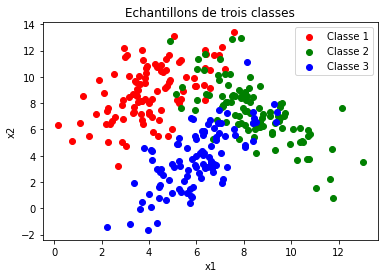

In [8]:
# Paramètres pour la génération des vecteurs aléatoires gaussiens
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])
m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])
m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])

# Génération des vecteurs aléatoires gaussiens
z1 = np.random.randn(2, 100)
x1 = sqrtm(s1) @ z1 + m1[:, np.newaxis]
z2 = np.random.randn(2, 100)
x2 = sqrtm(s2) @ z2 + m2[:, np.newaxis]
z3 = np.random.randn(2, 100)
x3 = sqrtm(s1) @ z3 + m3[:, np.newaxis]

# Affichage des échantillons
plt.scatter(x1[0], x1[1], c='r', label='Classe 1')
plt.scatter(x2[0], x2[1], c='g', label='Classe 2')
plt.scatter(x3[0], x3[1], c='b', label='Classe 3')
plt.legend()
plt.title("Echantillons de trois classes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 4. Courbes d'équidensité

1. Ouvrir une autre fenêtre. Créer une grille de points $X(i)$, $Y(j)$ répartis régulièrement dans l'espace de taille $57\times 57$ entre les valeurs $0.27$ et $12.5$ pour la première mesure et $-2$ et $15$ pour la deuxième mesure (Utiliser la fonction `linspace`).

In [9]:
# définir les bornes pour chaque dimension
xmin, xmax = 0.27, 12.5
ymin, ymax = -2, 15

# définir le nombre de points dans chaque dimension
n_points = 57

# créer les grilles de points
X, Y = np.meshgrid(np.linspace(xmin, xmax, n_points), np.linspace(ymin, ymax, n_points))

2. Pour la classe 1 de la question 3.5, construire la matrice `dens1(i,j)` contenant la densité de probabilité conditionnelle en chaque point $(X(i), Y(j))$ de la grille.

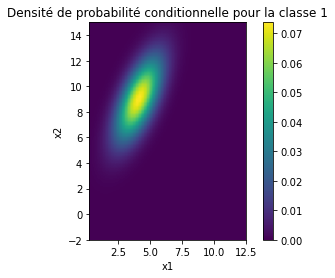

In [10]:
# Paramètres pour la génération des vecteurs aléatoires gaussiens
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])

# Génération des vecteurs aléatoires gaussiens
z1 = np.random.randn(2, 100)
x1 = sqrtm(s1) @ z1 + m1[:, np.newaxis]

m1 = x1.mean(axis=1)
s1 = np.cov(x1)
XY = np.dstack((X, Y))
XYm1 = XY - m1
s1_inv = np.linalg.inv(s1)
det_s1 = np.linalg.det(s1)
term1 = 1 / (2 * np.pi * np.sqrt(det_s1))
exponent = -0.5 * np.sum((XYm1 @ s1_inv) * XYm1, axis=2)
dens1 = term1 * np.exp(exponent)

# Affichage de la densité de probabilité conditionnelle
plt.imshow(dens1, extent=[xmin, xmax, ymin, ymax], origin='lower')
plt.colorbar()
plt.title("Densité de probabilité conditionnelle pour la classe 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

3. Afficher les courbes d'équidensités pour la classe 1 à l'aide de la fonction `contour`. Quelle est la forme de ces courbes ?

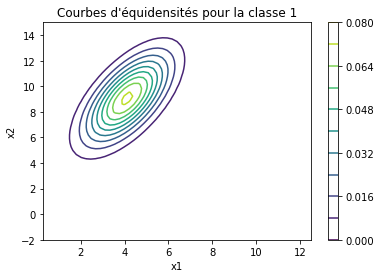

Les courbes d'équidensités pour la classe 1 sont des ellipses.

In [11]:
# Affichage des courbes d'équidensités pour la classe 1
plt.contour(X, Y, dens1, levels=10)
plt.colorbar()
plt.title("Courbes d'équidensités pour la classe 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

display_markdown(r"Les courbes d'équidensités pour la classe 1 sont des ellipses.")

4) Faire de même pour les deux autres classes. Représenter en 3-D sur la même figure les trois lois de densités conditionnelles (utiliser la fonction `mesh`). Expliquer l'allure des amplitudes maximales des lois de densités

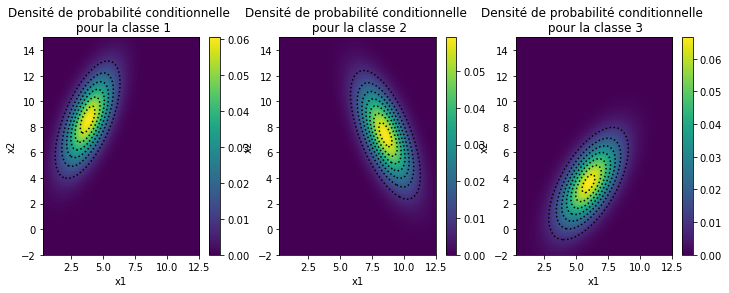

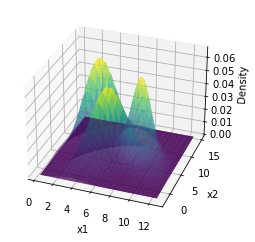

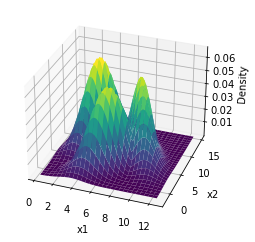

In [12]:
# Paramètres pour la génération des vecteurs aléatoires gaussiens
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])
m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])
m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])

# Génération des vecteurs aléatoires gaussiens
z1 = np.random.randn(2, 100)
x1 = sqrtm(s1) @ z1 + m1[:, np.newaxis]
z2 = np.random.randn(2, 100)
x2 = sqrtm(s2) @ z2 + m2[:, np.newaxis]
z3 = np.random.randn(2, 100)
x3 = sqrtm(s1) @ z3 + m3[:, np.newaxis]

m = [x1.mean(axis=1), x2.mean(axis=1), x3.mean(axis=1)]
s = [np.cov(x1), np.cov(x2), np.cov(x3)]

# définir les bornes pour chaque dimension
xmin, xmax = 0.27, 12.5
ymin, ymax = -2, 15

# définir le nombre de points dans chaque dimension
n_points = 57

# créer les grilles de points
X, Y = np.meshgrid(np.linspace(xmin, xmax, n_points), np.linspace(ymin, ymax, n_points))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
dens=[]
for i in range(3):
    si = s[i]
    mi = m[i]
    XY = np.dstack((X, Y))
    XYmi = XY - mi
    si_inv = np.linalg.inv(si)
    det_si = np.linalg.det(si)
    termi = 1 / (2 * np.pi * np.sqrt(det_si))
    exponent = -0.5 * np.sum((XYmi @ si_inv) * XYmi, axis=2)
    densi = termi* np.exp(exponent)
    dens.append(densi)
    
    # Affichage de la densité de probabilité conditionnelle
    im = axs[i].imshow(densi, extent=[xmin, xmax, ymin, ymax], origin='lower')
    axs[i].contour(X, Y, densi, linestyles='dotted', colors='black')
    axs[i].set_title(f"Densité de probabilité conditionnelle \n pour la classe {i+1}")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    
    # Affichage de l'échelle de densité
    fig.colorbar(im, ax=axs[i-1])
    ax.contour(X, Y, dens[i], levels=10, linestyles='dotted', colors='black')


# Afficher les 3 densités conditionnelles sur le même graphe 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for i in range(3):
    ax.plot_surface(X, Y, dens[i], cmap='viridis', alpha=0.5)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")

ax.view_init(elev=30, azim=-70)

plt.show()

# calcul de la densité max pour un meilleur visuel
max_dens = np.maximum.reduce(dens)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, max_dens, cmap='viridis', alpha=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")
ax.view_init(elev=30, azim=-70)

plt.show()

L'allure des amplitudes maximales des lois de densités dépend des paramètres de chaque loi de densité conditionnelle. Plus précisément, la forme des amplitudes maximales reflète la forme des covariances des vecteurs aléatoires gaussiens associés à chaque loi.

En effet, la covariance détermine la direction et l'intensité de la corrélation entre les variables aléatoires, et peut donc affecter la forme de la densité de probabilité. Par exemple, si les variables aléatoires ont une forte corrélation positive, cela peut donner une densité de probabilité allongée dans la direction de la corrélation. De même, si les variables aléatoires ont une corrélation négative, cela peut donner une densité de probabilité allongée dans une direction opposée à la corrélation.

## 5. Visualisation des frontières
1) Classer les points $(X(i), Y(j))$ de la grille précédente. On utilisera une matrice $Z(i,j)$ dont les éléments contiendront l'étiquette $(1, 2 \text{ ou }3)$ de la classe obtenue pour chacun des éléments de la grille.

2) Pour faire apparaître les frontières entre classes, appliquer la fonction contour à la transposée de $Z$ et aux vecteurs $X$ et $Y$. Indiquez les régions de l'espace correspondant à chacune des classes. On pourra superposer les frontières aux points échantillons.

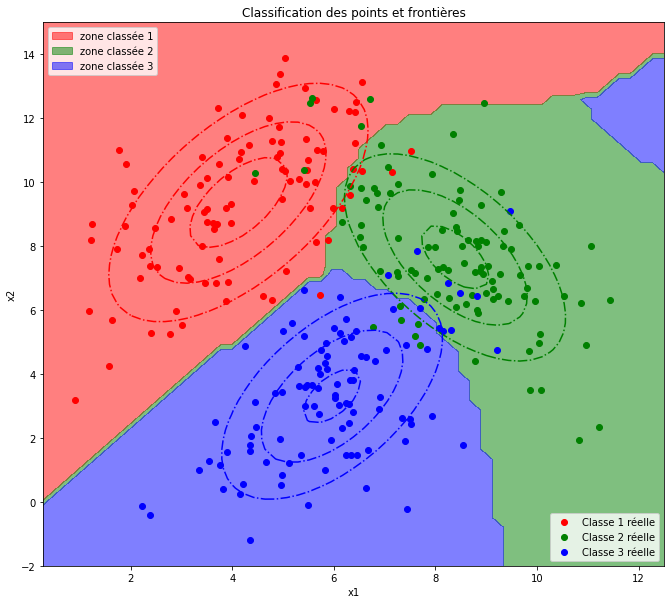

In [13]:
from matplotlib.patches import Rectangle

# Paramètres pour la génération des vecteurs aléatoires gaussiens
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])
m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])
m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])

# Génération des vecteurs aléatoires gaussiens
z1 = np.random.randn(2, 100)
x1 = sqrtm(s1) @ z1 + m1[:, np.newaxis]
z2 = np.random.randn(2, 100)
x2 = sqrtm(s2) @ z2 + m2[:, np.newaxis]
z3 = np.random.randn(2, 100)
x3 = sqrtm(s1) @ z3 + m3[:, np.newaxis]

m = [x1.mean(axis=1), x2.mean(axis=1), x3.mean(axis=1)]
s = [np.cov(x1), np.cov(x2), np.cov(x3)]

# définir les bornes pour chaque dimension
xmin, xmax = 0.27, 12.5
ymin, ymax = -2, 15

# définir le nombre de points dans chaque dimension
n_points = 57

# créer les grilles de points
X, Y = np.meshgrid(np.linspace(xmin, xmax, n_points), np.linspace(ymin, ymax, n_points))

dens=[]
for i in range(3):
    si = s[i]
    mi = m[i]
    XY = np.dstack((X, Y))
    XYmi = XY - mi
    si_inv = np.linalg.inv(si)
    det_si = np.linalg.det(si)
    termi = 1 / (2 * np.pi * np.sqrt(det_si))
    exponent = -0.5 * np.sum((XYmi @ si_inv) * XYmi, axis=2)
    densi = termi* np.exp(exponent)
    dens.append(densi)

# Classification des points de la grille
Z = np.argmax(dens, axis=0) + 1

fig, ax = plt.subplots(figsize=(15,10))

# Tracer la classification en 2D
cf = ax.contourf(X, Y, Z, alpha=0.5, levels=[0.5, 1.5, 2.5, 3.5], colors=['r', 'g', 'b'])

# Tracer les contours des densités précédentes
for i in range(len(dens)):
    ax.contour(X, Y, dens[i], colors=['r','g','b'][i], linestyles='dashdot', levels=3)

# Créer une légende pour la classification
dens_handles = [Rectangle((0,0),1,1, color=c, alpha=0.5) for c in ['r', 'g', 'b']]
dens_labels = ['zone classée 1', 'zone classée 2', 'zone classée 3']
dens_legend = ax.legend(dens_handles, dens_labels, loc='upper left')

# Ajouter la première légende à l'axe des sous-titres
ax.add_artist(dens_legend)
plt.subplots_adjust(right=0.7)

# Affichage des échantillons (que les points à l'intérieur de la grille)
x1_grid = x1[:,(x1[0]>=xmin) & (x1[0]<=xmax) & (x1[1]>=ymin) & (x1[1]<=ymax)]
x2_grid = x2[:,(x2[0]>=xmin) & (x2[0]<=xmax) & (x2[1]>=ymin) & (x2[1]<=ymax)]
x3_grid = x3[:,(x3[0]>=xmin) & (x3[0]<=xmax) & (x3[1]>=ymin) & (x3[1]<=ymax)]

#Afficher la 2e légende
echantillons_handles = [ax.scatter(x1_grid[0], x1_grid[1], c='r', label='Classe 1'),
                   ax.scatter(x2_grid[0], x2_grid[1], c='g', label='Classe 2'),
                   ax.scatter(x3_grid[0], x3_grid[1], c='b', label='Classe 3')]
echantillons_labels = ['Classe 1 réelle', 'Classe 2 réelle', 'Classe 3 réelle']
echantillons_legend= ax.legend(handles=echantillons_handles, labels=echantillons_labels, loc='lower right')

plt.title("Classification des points et frontières")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


## 6. Application
Cette application est issue du Cars dataset (collecté par E. Ramos et D. Donoho et entreposé dans la bibliothèque StatLib). Cet ensemble contient environ 400 échantillons
représentant des modèles de voitures et 8 variables les décrivent. La dernière variable est la classe des échantillons, c-a-d le continent d’origine du modèle : USA (1), Europe (2), Asie (3). Les modèles voitures ne sont pas équirépartis suivant les continents.

On veut prédire la classe du modèle (le continent d’origine) à partir de deux variables :
- `MPG`: miles per gallon relatif à la consommation du véhicule (en position 1)
- `weight` : le poids de la voiture (en position 5)

Déterminer le vecteur moyenne et la matrice de covariance de chacune des classes.
Tracer les frontières entre classes à partir des échantillons fournis dans le fichier
`voitures.mat` (`load voitures` renvoie dans la variable cars l’ensemble des échantillons).

Notes: 
* J'ai divisé l'attribut `weight` par `100` pour avoir une cohérence en ordre de grandeur entre mes deux axes et pouvoir afficher de manière convenable le résultat.
* La classification a ici une efficacité limitée pour notre jeu de données car les classes `Europe` et `Asia` se chevauchent. Peut-être d'autres observations de ce jeu de donnée pourraient servir à classifier avec un meilleur résultat, mais beaucoup de colonnes semblent correlées entre elles, sans nécessairement l'être avec `origin` (`MPG`, `horsepower`, `weight`, `time to accelerate from O to 60 mph`, `cylinders`).

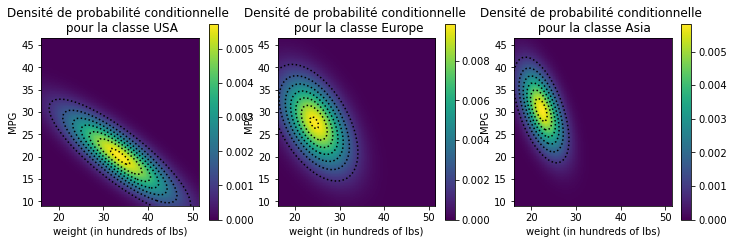

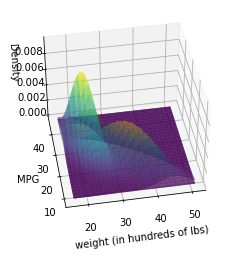

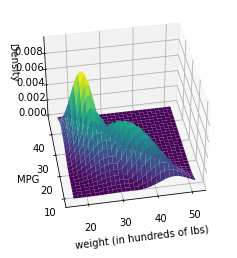

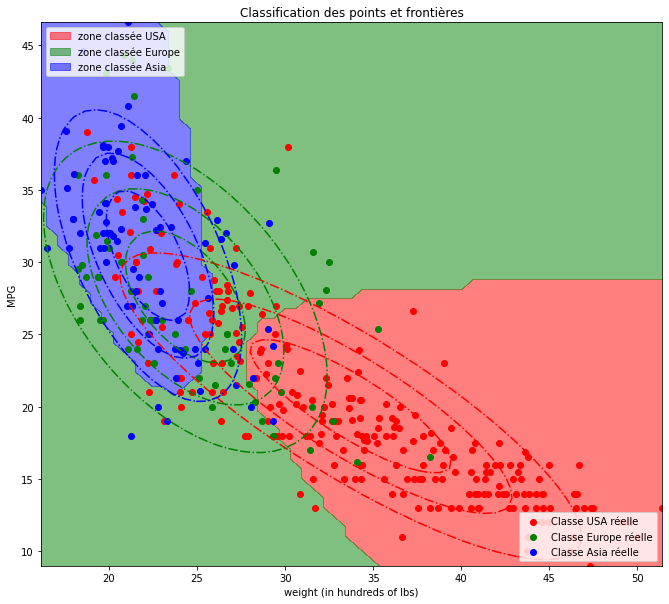

In [14]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Charger les données à partir du fichier voitures.mat
data = sio.loadmat('voitures.mat')

# Extraire les variables MPG, weight et la classe d'origine
mpg = data['cars'][:, 0].ravel()
weight = data['cars'][:, 4].ravel()
weight /= 100
origin = data['cars'][:, 7].ravel()

# Diviser les données en trois groupes en fonction de la classe d'origine
x1 = np.array([weight[origin == 1],mpg[origin == 1]])
x2 = np.array([weight[origin == 2],mpg[origin == 2]])
x3 = np.array([weight[origin == 3],mpg[origin == 3]])

m = [x1.mean(axis=1), x2.mean(axis=1), x3.mean(axis=1)]
s = [np.cov(x1), np.cov(x2), np.cov(x3)]

# définir les bornes pour chaque dimension
xmin, xmax = weight.min(), weight.max()
ymin, ymax = mpg.min(), mpg.max()

# définir le nombre de points dans chaque dimension
n_points = 57

# définir le nombre de points dans chaque dimension
n_points = 57

# créer les grilles de points
X, Y = np.meshgrid(np.linspace(xmin, xmax, n_points), np.linspace(ymin, ymax, n_points))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
dens=[]
for i in range(3):
    continent = ['USA', 'Europe', 'Asia'][i]
    si = s[i]
    mi = m[i]
    XY = np.dstack((X, Y))
    XYmi = XY - mi
    si_inv = np.linalg.inv(si)
    det_si = np.linalg.det(si)
    termi = 1 / (2 * np.pi * np.sqrt(det_si))
    exponent = -0.5 * np.sum((XYmi @ si_inv) * XYmi, axis=2)
    densi = termi* np.exp(exponent)
    dens.append(densi)
    
    # Affichage de la densité de probabilité conditionnelle
    im = axs[i].imshow(densi, extent=[xmin, xmax, ymin, ymax], origin='lower')
    axs[i].contour(X, Y, densi, linestyles='dotted', colors='black')
    axs[i].set_title(f"Densité de probabilité conditionnelle \n pour la classe {continent}")
    axs[i].set_xlabel("weight (in hundreds of lbs)")
    axs[i].set_ylabel("MPG")
    
    # Affichage de l'échelle de densité
    fig.colorbar(im, ax=axs[i-1], shrink=0.9)
    ax.contour(X, Y, dens[i], levels=10, linestyles='dotted', colors='black')


# Afficher les 3 densités conditionnelles sur le même graphe 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for i in range(3):
    ax.plot_surface(X, Y, dens[i], cmap='viridis', alpha=0.5)

ax.set_xlabel("weight (in hundreds of lbs)")
ax.set_ylabel("MPG")
ax.set_zlabel("Density")

ax.view_init(elev=40, azim=-100)

plt.show()

# calcul de la densité max pour un meilleur visuel
max_dens = np.maximum.reduce(dens)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, max_dens, cmap='viridis', alpha=1)
ax.set_xlabel("weight (in hundreds of lbs)")
ax.set_ylabel("MPG")
ax.set_zlabel("Density")
ax.view_init(elev=40, azim=-100)

plt.show()

# Classification des points de la grille
Z = np.argmax(dens, axis=0) + 1

fig, ax = plt.subplots(figsize=(15,10))

# Tracer la classification en 2D
cf = ax.contourf(X, Y, Z, alpha=0.5, levels=[0.5, 1.5, 2.5, 3.5], colors=['r', 'g', 'b'])

# Tracer les contours des densités précédentes
for i in range(len(dens)):
    ax.contour(X, Y, dens[i], colors=['red', 'green', 'blue'][i], linestyles='dashdot', levels=3)


# Créer une légende pour la classification
dens_handles = [Rectangle((0,0),1,1, color=c, alpha=0.5) for c in ['r', 'g', 'b']]
dens_labels = ['zone classée USA', 'zone classée Europe', 'zone classée Asia']
dens_legend = ax.legend(dens_handles, dens_labels, loc='upper left')

# Ajouter la première légende à l'axe des sous-titres
ax.add_artist(dens_legend)
plt.subplots_adjust(right=0.7)

# Affichage des échantillons (que les points à l'intérieur de la grille)
x1_grid = x1[:,(x1[0]>=xmin) & (x1[0]<=xmax) & (x1[1]>=ymin) & (x1[1]<=ymax)]
x2_grid = x2[:,(x2[0]>=xmin) & (x2[0]<=xmax) & (x2[1]>=ymin) & (x2[1]<=ymax)]
x3_grid = x3[:,(x3[0]>=xmin) & (x3[0]<=xmax) & (x3[1]>=ymin) & (x3[1]<=ymax)]

#Afficher la 2e légende
echantillons_handles = [ax.scatter(x1_grid[0], x1_grid[1], c='r', label='Classe USA'),
                   ax.scatter(x2_grid[0], x2_grid[1], c='g', label='Classe Europe'),
                   ax.scatter(x3_grid[0], x3_grid[1], c='b', label='Classe Asia')]
echantillons_labels = ['Classe USA réelle', 'Classe Europe réelle', 'Classe Asia réelle']
echantillons_legend= ax.legend(handles=echantillons_handles, labels=echantillons_labels, loc='lower right')

plt.title("Classification des points et frontières")
plt.xlabel("weight (in hundreds of lbs)")
plt.ylabel("MPG")
plt.show()
